# MNIST Enhancements
For this notebook, the goal is to provide a number of improvements to the Neural Network defined in the MNIST Vanilla notebook; this is to refamiliarize us with the following topics:

* ReLU (and other) Activation Functions
* Cross Entropy & Softmax Cost Functions
* Regularization Techniques (L1, L2, Dropout)
* Learning Rate Algorithms (TBD)

## Getting Started
With some small modifications to the Network class defined in the MNIST Vanilla notebook, we can now import all of our previous work. See the following files in the **libs** folder to examine the changes; primarily, the changes allow us to supply different activation functions and cost functions for the network. It should be noted that different layers in a neural network can (and often do) have different activation functions, but to keep the scope from getting out of hand, we simply define one activation function for the entire network.

### Import Necessary Libraries
Nothing too surprising here. We load the **network** python file mentioned above, provide some Jupyter configuration, and reload the MNIST dataset

In [1]:
import sys
sys.path.append('/notebooks/projects/MNIST/libs')  # Jupyter import fix
import numpy as np
import network
import network_ce
import matplotlib.pyplot as plt
%matplotlib inline

# Reload the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Verify It Works
Here, we'll define and train another network, just like at the end of the last notebook. *Note the new keyword arguments specifying the test data & labels*

In [2]:
deep_network = network.Network(784,100,20,10)
mse_cost = deep_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=30, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

0.449975839762 1135 / 10000
0.449912287983 1135 / 10000
0.449968891986 1135 / 10000
0.44992055809 1135 / 10000
0.449945373114 1135 / 10000
0.449903742943 1135 / 10000
0.449905197755 1135 / 10000
0.449974896014 1135 / 10000
0.450009697038 1135 / 10000
0.449924198004 1010 / 10000
0.450052785236 974 / 10000
0.449992236052 1135 / 10000
0.45010733942 1135 / 10000
0.449913259588 1135 / 10000
0.449933833457 1032 / 10000
0.449899320266 1135 / 10000
0.449835065275 1135 / 10000
0.449848109852 1135 / 10000
0.449770891838 1135 / 10000
0.44976420732 1135 / 10000
0.44963018526 1135 / 10000
0.44966462176 1135 / 10000
0.44940681508 1135 / 10000
0.448229398708 2758 / 10000
0.439544282468 1698 / 10000
0.406620377293 2397 / 10000
0.394376587611 2935 / 10000
0.379867674322 3312 / 10000
0.367365942826 3803 / 10000
0.359096510296 4025 / 10000


# ReLU
For fully-connected layers in a network, ReLU has become the current gold-standard, due to its simplicity and efficiency. Many variants of it now exist, but we'll keep it simple for now. ReLU is wonderful not only because it's simple, but because its derivative is constant, meaning that gradient descent doesn't slow down with larger networks (no sigmoid derivative, which we'll see again with Cross Entropy next).

In [3]:
def relu(z):
    return np.maximum(0, z)  # For each element, return 0 if z[i] <= 0, else return z[i]

def relu_prime(z):  # Similar to above, but return 1 if z[i] > 0 instead of z
    out = np.copy(z)
    out[out<=0] = 0
    out[out>0] = 1
    return out

## Define the Activation
To use ReLU in our network, we simply define an Activation object and supply it when defining our Network object. 

*Note*: To support future changes to the cost function, along with many other reasons not listed here, it's better to define activations for each layer, so you can support multiple activation fuctions in one network (e.g. need the output layer to be sigmoid or softmax, while the rest can be ReLU)

In [4]:
from activations import Activation
ReLU = Activation(relu, relu_prime)

# Test and verify that the activation and derivations are working as expected
rand = np.random.randn(3, 3)
print('Test Matrix:\n',rand)
print('ReLU:\n',ReLU.activate(rand))
print('ReLU Derivative:\n',ReLU.derive(rand))

Test Matrix:
 [[-0.62005269 -1.23466063 -0.66512931]
 [-1.09545393 -1.51667587 -0.13271472]
 [ 0.89529023  0.19272295 -0.35767351]]
ReLU:
 [[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.89529023  0.19272295  0.        ]]
ReLU Derivative:
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]]


Now, define the network object:

In [5]:
relu_network = network.Network(784,100,20,10, activation=ReLU)

And train. Note the *much* lower **learning_rate** parameter. An issue that crops up with using ReLU is exploding gradients. This issue can be mitigated a number of ways, such as regularization, or using leaky ReLU (not explored here). Run this multiple times (or incrase the epochs parameter) to perform additional training. 

The highest classification accuracy I've seen so far at this point is **97.45%**

In [6]:
relu_cost = relu_network.train(mnist.train.images, mnist.train.labels, learning_rate=0.1, batch_size=200, epochs=30, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

0.451603112615 980 / 10000
0.450474032984 1010 / 10000
0.449003687443 965 / 10000
0.409254326695 2631 / 10000
0.358449908965 3957 / 10000
0.304928381028 5058 / 10000
0.257471421608 6688 / 10000
0.183885502053 8045 / 10000
0.135608899491 8561 / 10000
0.10964011665 8799 / 10000
0.0955454650436 8985 / 10000
0.0837568039805 9105 / 10000
0.0744007392146 9224 / 10000
0.068150035903 9285 / 10000
0.0632452424595 9326 / 10000
0.0594159802821 9373 / 10000
0.0564065444697 9407 / 10000
0.0552886646541 9423 / 10000
0.0505586739784 9466 / 10000
0.0498097105838 9467 / 10000
0.0461729622482 9493 / 10000
0.0447580297368 9514 / 10000
0.0437520719267 9519 / 10000
0.0419841134356 9557 / 10000
0.0410312715218 9553 / 10000
0.0386511323437 9586 / 10000
0.0376058877161 9574 / 10000
0.0365443368989 9592 / 10000
0.0350452992383 9606 / 10000
0.0343573134317 9625 / 10000


Classification accuracy increases much earlier and each epoch executes faster. Occasionally, the network can get "stuck" and not be able to update the cost at all; one possibility is due to "dead" neurons.

# Cross Entropy
An alternative cost function to Mean Squared Error
## What it does
With MSE, when an error is very wrong, it can take a long time to "get the ball rolling"; that is, it can take a long time for efficient learning to occur. By taking advantage of a couple assumptions, it can reduce training time significantly. It does so by removing the sigmoid derivative from the error calculation, which is the source of the slowdown (i.e. when the network is very wrong, the sigmoid derivative becomes very small which slows training)
## Assumptions
There are two primary requirements/assumptions
* We're solving a classification problem (e.g. output should be 0 or 1)
* Our output layer has a sigmoid activation function

## The Code
We won't redefine the entire training function here; however, the cost function looks like this:

In [7]:
def cross_entropy_cost(y, y_pred):
    ce = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    return - np.sum(ce) / len(ce)

def cross_entropy_cost_prime(y, y_pred, hidden_a=None):
    return y_pred - y

And the relevant change to the training function looks like this:  

`dL = self.cost.calculate_derivative(lbls, a[-1])  # Cross Entropy doesn't have hadamard product`  

Everything else remains the same! Let's see how our network performs with the new cost function

In [8]:
ce_network = network_ce.NetworkCE(784,100,20,10)
ce_cost = ce_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=30, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

2.77992724319 2651 / 10000
2.08224189649 6010 / 10000
0.965064546221 8669 / 10000
0.604118612583 9089 / 10000
0.463529882357 9304 / 10000
0.376623235391 9395 / 10000
0.314187868762 9473 / 10000
0.276056932678 9522 / 10000
0.250019038613 9580 / 10000
0.235056172552 9590 / 10000
0.19703173752 9649 / 10000
0.176004525389 9663 / 10000
0.158284065704 9676 / 10000
0.154031141363 9706 / 10000
0.140709593203 9701 / 10000
0.129701771578 9709 / 10000
0.12325422139 9714 / 10000
0.111839168112 9717 / 10000
0.0996104735285 9740 / 10000
0.0951556211666 9738 / 10000
0.0875607648239 9735 / 10000
0.0794790858646 9755 / 10000
0.0832229196043 9724 / 10000
0.0738754574135 9737 / 10000
0.0683708828262 9748 / 10000
0.0611208665733 9748 / 10000
0.0564042226876 9752 / 10000
0.054477306965 9742 / 10000
0.0511211544207 9743 / 10000
0.0488402806444 9750 / 10000


## Results
With everything else held constant--network shape, activation functions, learning rate--it's obvious the benefit that cross entropy provides to the speed at which our network learns. 

*Note*: Really, just the shape of this plot matters. Notice how long it takes for MSE to begin significantly decreasing as opposed to Cross Entropy. Even though MSE cost starts at *only* 0.44, it's incomparable to Cross Entropy--in fact, at cost = 0.45, Cross Entropy was already correctly classifying 93% of images, whereas MSE hadn't figured anything out yet! 

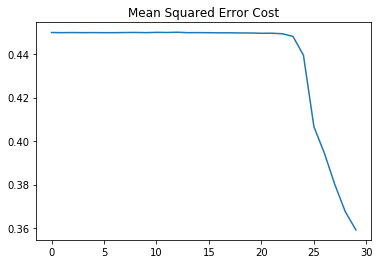

In [9]:
plt.title('Mean Squared Error Cost')
plt.plot(mse_cost)

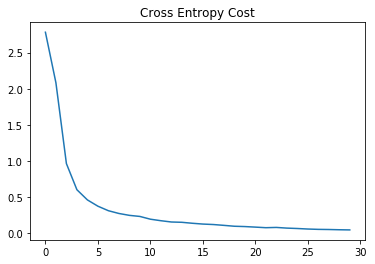

In [10]:
plt.title('Cross Entropy Cost')
plt.plot(ce_cost)

# Softmax Activation and Cost
Softmax (aka Log Likelihood) allows our network to represent its output as a probability distribution--that is, summing all outputs for a single sample will equal 1. This can **only be used for disjoint categories/classes** (e.g. if an image can be classified as a cat *and* an animal, softmax won't work).

## A Note About Vectorization
Softmax definitions typically are written with respect to a single sample. In this case, we wish to vectorize it to work on the entire mini-batch. To that end, the numpy max function is used to reduce all z values to prevent softmax from exploding and giving us NaN/inf errors; for both the max function and the summation, the axis must be set and the result must keep the original dimensions. By doing this, the functions will operate **per sample**, giving us the maximum value in a sample and summing the outputs of all nodes **in each given sample**. 

## Activation Function
To use Softmax, change the activation function of *just* the output layer to the softmax function below (we won't bother defining the derivative, as it's not needed):

In [11]:
from activations import Activation
from cost import Cost
def softmax(z):
    stable_z = z - np.max(z,axis=-1,keepdims=True)
    z_exp = np.exp(stable_z)
    return z_exp / np.sum(z_exp, axis=-1, keepdims=True)
    #exp_max = np.exp(z - np.max(z,axis=-1,keepdims=True))
    #out = exp_max/np.sum(exp_max,axis=-1,keepdims=True)
    #return out

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

sigmoid_activation = Activation(sigmoid, sigmoid_prime)
softmax_activation = Activation(softmax, None)

softmax_activations = [sigmoid_activation, sigmoid_activation, softmax_activation]
sigmoid_activations = [sigmoid_activation, sigmoid_activation, sigmoid_activation]
relu_ce_activations = [ReLU, ReLU, sigmoid_activation]

## Cost Function
The cost function used with Softmax is the Log-Likelihood function; the derivative becomes the same as the MSE and CE derivatives:

In [12]:
def softmax_cost(y, y_pred):
    return - np.sum(np.max(np.log(y_pred),axis=-1, keepdims=True)) / len(y_pred)

def softmax_cost_prime(y, y_pred):
    return y_pred - y


## Testing it out
We can now build our network, making sure to use the softmax activation function in the output layer. 

In [14]:
softmax_network = network_ce.NetworkCE(784,100,20,10, activations=softmax_activations, cost=Cost(softmax_cost, softmax_cost_prime))
softmax_cost = softmax_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=10, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

1.6495844819 2810 / 10000
1.29744131288 3501 / 10000
0.650390158902 7024 / 10000
0.253691101758 8663 / 10000
0.164069410632 8990 / 10000
0.137037144103 9108 / 10000
0.108962983453 9311 / 10000
0.0915231322642 9444 / 10000
0.0810809596267 9500 / 10000
0.0719934952742 9523 / 10000


The results seem to line up well with what we had when using Cross Entropy, so we'll just keep this one tucked in our toolbelt, ready if necessary.

# Regularization
The following regularization will be explored:  
* L2 
* L1
* Dropout  

L1/L2 regularization operate simply and similarly: they introduce **weight decay**; L1 pulls the weights toward zero (reduces them by a constant amount) and L2 scales the weights down (e.g. each training pass multiplies the weights by something like 95%). They can be used individually or together.

Dropout works entirely differently. When training, dropout randomly sets the output to zero for a percentage of the neurons. During backpropagation, we need to then nullify the activation (and gradient) for those neurons. During testing, dropout should not be used; instead, the outputs of the neurons should be scaled down. In this way, we're kind of creating many networks in one and choosing the output of the most likely solution. 

 ## L2 Regularization
 For both L2 and L1 regularization, we add a new term to the cost function being used; however, it is the same regardless of which cost function is used, so we'll add it to our training.
 
 
 `# Add L2 Cost to Cost Function
l2_cost = np.sum(self.W**2) * l2_lambda / (2 * len(a))
training_cost.append(self.cost.calculate(labels, a[-1]) + l2_cost`

And update the derivative:

`l2_loss = (1 - learning_rate * l2_lambda / batch_size)
for j in range(len(self.W)):
    self.W[j] = l2_loss * self.W[j] - learning_rate * dWl[j]
    self.B[j] -= (learning_rate / batch_size) * dBl[j]`  
    
To utilize it, we simply declare a non-zero **l2_lambda** when training:

In [15]:
l2_network = network_ce.NetworkCE(784,100,20,10, activations=sigmoid_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime))
l2_cost = l2_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=10, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels, l2_lambda=0.001)

2.75680801475 2722 / 10000
2.37774347763 3980 / 10000
1.27174928841 7967 / 10000
0.852060032577 8928 / 10000
0.673231439795 9202 / 10000
0.605198472388 9322 / 10000
0.564355916083 9402 / 10000
0.527382261693 9467 / 10000
0.516726823119 9504 / 10000
0.495622265807 9562 / 10000


Not explicitly shown above is that a properly tuned regularizer should reduce the gap between training error and testing error, indicating that overfitting is being mitigated. We'll look at that below when implementing Dropout

Note: softmax (or any other cost function) is **not** a requirement for using L2 or L1 regularization

## L1 Regularization
Similar to L2, L1 gets added in like so:  

Cost:  
`l1_cost = l1_lambda * np.sum([np.sum(np.abs(w)) for w in self.W]) / len(a)
training_cost.append(self.cost.calculate(labels, a[-1]) + l2_cost + l1_cost)`  

Derivative:  
`l1_loss = - learning_rate * l1_lambda / batch_size
for j in range(len(self.W)):
    self.W[j] = l2_loss * self.W[j] + l1_loss * np.sign(self.W[j]) - (learning_rate / batch_size) * dWl[j]
    self.B[j] -= (learning_rate / batch_size) * dBl[j]`  

Using L1 regularization also requires us to set a non-zero **l1_lambda** when training:

In [16]:
l1_network = network_ce.NetworkCE(784,100,20,10, activations=sigmoid_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime))
l1_cost = l1_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=10, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels, l1_lambda=0.001)

3.07132676416 2330 / 10000
2.9220845948 3431 / 10000
2.05098738308 7487 / 10000
1.66078088763 8717 / 10000
1.51627884548 9158 / 10000
1.50957419485 9307 / 10000
1.48261522797 9451 / 10000
1.51693632422 9480 / 10000
1.51147725509 9553 / 10000
1.52291020413 9575 / 10000


A simple sanity test that L1/L2 is working as expected could be to set the lambda to a high value and see if the sum of the weights is close to zero; without regularization, this tends to happen less often (not to say it couldn't happen).

**Note**: Nothing stops us from using both L1 and L2 at the same time. Simply set both lambdas to a positive value

## Dropout
Vastly different from L1 & L2, Dropout requires that a random number of neurons have their activations set to zero. To do so, we'll simply use a flag for enabling it, which will drop 20% of the input data and 50% of each hidden layer's activations*.  

First, we need a way to make the *mask*, a matrix of 1s with percentage p of its elements set to 0:

***Note**: A more robust implementation of Dropout would allow you to tune the dropout probability, but for demonstration purposes, we'll use the values defined above; these values are used in the original paper describing Dropout and can be found at https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf .


In [17]:
def dropout_mask(shape, threshold=0.5):
    assert len(shape) == 2
    mask = np.random.rand(shape[0], shape[1])
    mask[mask<threshold] = 0
    mask[mask!=0] = 1
    return mask

mask = dropout_mask((3, 5))
a = np.random.rand(3, 5)
print('Mask:\n',mask)
print('Activations:\n',np.multiply(mask, a))

Mask:
 [[ 1.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  1.]
 [ 1.  0.  1.  1.  0.]]
Activations:
 [[ 0.90812353  0.          0.19343038  0.48488151  0.        ]
 [ 0.          0.53516386  0.9985114   0.          0.5264364 ]
 [ 0.30092327  0.          0.64862249  0.36775605  0.        ]]


Next, we'll define a new network class called **DropoutNetwork**. It's based on the previous NetworkCE code, but includes everything necessary to make dropout work. Additionally, the return value from the train() function now returns an array of the cost, training accuracy, and testing accuracy for each epoch:

In [18]:
from misc import shuffle

class DropoutNetwork:
    
    def __init__(self, *layers, activations=None, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime), dropout=True):
        # assert activation is not None
        self.layers = [l for l in layers]
        
        if activations is not None:
            assert len(activations) == len(layers) - 1
            self.activations = [a for a in activations]
        else:
            self.activations = [Activation(sigmoid, sigmoid_prime) for i in range(len(layers) - 1)]
            
        self.W = [np.random.rand(layers[i], layers[i+1]) * 0.001 for i in range(len(layers) - 1)]  
        self.B = [np.random.rand(1, layers[i+1]) for i in range(len(layers) - 1)]  # Input layer doesn't have bias
        
        if dropout:
            self.drop = [0.8] + [0.5 for l in range(len(layers) - 2)] + [1] # 
        else:
            self.drop = [1.0 for l in range(len(layers))]
        self.cost = cost
    
    def feedforward(self, x, test=False):
        masks = []
        output = []
        a = x
        
        if test == False:
            masks += [dropout_mask(x.shape, threshold=1-self.drop[0])]
            a = np.multiply(a, masks[0])
        # Experiment with scaling inputs just as we do with activations
        
        output += [a]
        z_products = []
        
        for b, w, p, activation in zip(self.B, self.W, self.drop[1:], self.activations):
            if test == False:  # Only scale activations if we're testing
                p = 1
                
            z = np.dot(a, w) + b
            a = p * activation.activate(z)
            if test == False:
                masks += [dropout_mask(z.shape, threshold=1-p)]
                output.append(np.multiply(a, masks[-1]))
            else:
                output.append(a)
            z_products.append(z)
        return output, z_products, masks

    def train(self, images, labels, batch_size=200, learning_rate=0.01, epochs=10, test_epoch=5, test_images=None, test_labels=None, l2_lambda=0, l1_lambda=0):
        assert len(images) == len(labels)
        training_cost = []
        output = []
        for i in range(epochs):
            shuffle(images, labels)
            # Divide training data into batches
            img_batches = [images[i:i+batch_size] for i in range(0, len(images), batch_size)]
            label_batches = [labels[i:i+batch_size] for i in range(0, len(labels), batch_size)]
            n_batches = len(img_batches)


            for imgs, lbls in zip(img_batches, label_batches):
                a, z, masks = self.feedforward(imgs)

                # Calculate Output Error
                # dL = np.multiply(self.cost.calculate_derivative(lbls, a[-1]),self.activations[-1].derive(z[-1]))  # MSE Cost Error
                l2_loss = (1 - learning_rate * l2_lambda / batch_size)
                l1_loss = - learning_rate * l1_lambda / batch_size
                dL = self.cost.calculate_derivative(lbls, a[-1])  # Cross Entropy doesn't have hadamard product  # CE Cost Error
                # Update biases and weights for output layer using output error
                dBL = np.reshape(np.sum(dL, axis=0), (1,dL.shape[1]))
                dWL = np.dot(a[-2].T, dL)
                # Being verbose to show that we're building a list of deltas for each layer in the network (excluding input layer)
                dBl = [dBL]
                dWl = [dWL]
                dl = dL
                
                # Calculate Hidden Error
                for l in range(len(a) - 2, 0, -1):  # -1 for zero-indexing, -1 more because output layer already calculated
                    dl = np.multiply(np.dot(dl, self.W[l].T), np.multiply(self.activations[l-1].derive(z[l-1]), masks[l]))
                    dBl.insert(0, np.reshape(np.sum(dl, axis=0), (1, dl.shape[1])))
                    dWl.insert(0, np.dot(a[l-1].T, dl))

                # Update weights and biases
                for j in range(len(self.W)):
                    self.W[j] = l2_loss * self.W[j] + l1_loss * np.sign(self.W[j]) - (learning_rate / batch_size) * dWl[j]
                    self.B[j] -= (learning_rate / batch_size) * dBl[j]


            # Cost after training this epoch
            a, z, masks = self.feedforward(images, test=True)
            l2_cost = np.sum([np.sum(w ** 2) for w in self.W]) * l2_lambda / (2 * len(a))
            l1_cost = l1_lambda * np.sum([np.sum(np.abs(w)) for w in self.W]) / len(a)
            training_cost.append(self.cost.calculate(labels, a[-1]) + l2_cost + l1_cost)
            result = [training_cost[-1]]

            result += [self.test(images, labels) / len(images)]
            if test_images is not None and test_labels is not None and (i + 1) % test_epoch == 0:
                result += [self.test(test_images, test_labels) / len(test_images)]
            else:
                result += [None]
            print(result)
            output.append(result)
        return np.asarray(output)
    
    def test(self, test_images, test_labels):
        img = test_images
        a, z, masks = self.feedforward(img, test=True)
        a[-1].shape
        prediction = np.argmax(a[-1], axis=1)
        truth = np.argmax(test_labels, axis=1)
        result = np.sum([p == i for p, i in zip(prediction, truth)])
        return result


Define the dropout network and begin testing:

In [19]:
dropout_network = DropoutNetwork(784,100,30,10, activations=relu_ce_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime))
dropout_cost = dropout_network.train(mnist.train.images, mnist.train.labels, learning_rate=0.15, batch_size=100, epochs=20, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

[4.9194439620448831, 0.090672727272727266, 0.089200000000000002]
[3.2096470621846902, 0.43058181818181818, 0.43919999999999998]
[1.7092278693120284, 0.79763636363636359, 0.79700000000000004]
[1.4937725257727459, 0.87156363636363632, 0.86909999999999998]
[1.1902994448313498, 0.92118181818181821, 0.9204]
[1.0491747893205332, 0.93825454545454545, 0.93600000000000005]
[1.1057856018673919, 0.92136363636363638, 0.91810000000000003]
[0.92365473011777666, 0.94330909090909087, 0.93830000000000002]
[0.84943093633738243, 0.95670909090909095, 0.95130000000000003]
[0.8754342925088241, 0.94407272727272729, 0.9355]
[0.81218000680149882, 0.95134545454545449, 0.94359999999999999]
[0.8223347624551296, 0.93790909090909091, 0.93300000000000005]
[0.70199913641145961, 0.96425454545454548, 0.95589999999999997]
[0.70607483713376118, 0.95940000000000003, 0.9546]
[0.64415788212795111, 0.96758181818181821, 0.96020000000000005]
[0.70575946870537853, 0.95845454545454545, 0.95279999999999998]
[0.58800717751191289, 

Plot the results. Note the gap between the training data and test data:

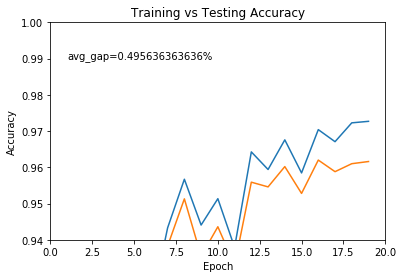

In [20]:
train_accuracy = dropout_cost[:,1]
test_accuracy = dropout_cost[:,2]
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, len(train_accuracy), 0.94, 1])
plt.text(1, 0.99, 'avg_gap=' + str(100 * (np.mean(train_accuracy) - np.mean(test_accuracy))) + '%')
plt.plot(train_accuracy)
plt.plot(test_accuracy)


Again, we'll run the same network without dropout:

In [ ]:
boring_network = DropoutNetwork(784,100,30,10, activations=relu_ce_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime), dropout=False)
boring_cost = boring_network.train(mnist.train.images, mnist.train.labels, learning_rate=0.15, batch_size=100, epochs=20, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

[3.241258594519445, 0.20367272727272728, 0.2064]
[1.0230284234925897, 0.83250909090909087, 0.84250000000000003]


And plot the results, noting the gap:

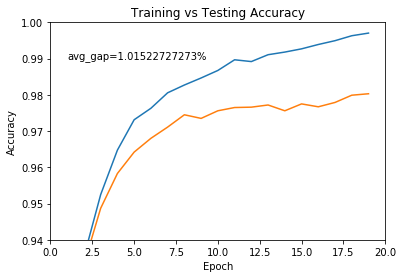

In [66]:
train_accuracy = boring_cost[:,1]
test_accuracy = boring_cost[:,2]
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.text(1, 0.99, 'avg_gap=' + str(100 * (np.mean(train_accuracy) - np.mean(test_accuracy))) + '%')
plt.axis([0, len(train_accuracy), 0.94, 1])
plt.plot(train_accuracy)
plt.plot(test_accuracy)


The main takeaway from this example is that without regularization (through dropout, in this case), the accuracy of the training classification pushes toward 100% while the testing accuracy tapers off. With regularization, the gap between the two decreases and helps ensure that improvements in training classification carry over to the testing classification (i.e. the network isn't just memorizing the training set)

# Additional Notes
Bear in mind, much of what's implemented in the previous notebook and this one are quick and dirty implementations. While I've tried to ensure that everything is robust, there are almost certainly some issues with the code and a million ways it could be improved (e.g. the train() method should most definitely be split into multiple methods, the test method could be a standalone function, etc). However, the basic ideas discussed should be apparent. 

All of this is simply intended to be a review of basic deep learning principles. If you spot anything blatantly wrong with what's presented here, please let me know! My goal is to better understand everything foundational about machine learning

Next up, we'll take these basic ideas and implement them in TensorFlow. From there, we'll quickly move on to other network types, such as CNN and LSTM. Time permitting, I'll try to touch on reinforcement learning, generative adversarial networks, and more.